# (TEST NOTEBOOK) Where and when is the salinity negative?
See `negative_salinity.py` and `ppi-sub-neg-sal.sh` to run proper jobs

In [2]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [3]:
import xarray as xr
from anemoi.datasets import open_dataset 
from anemoi.datasets import MissingDateError
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file_2012 = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2012_surface.zarr'
file_2024 = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2024_surface.zarr'

ds_sal_2012 = open_dataset(file_2012, select = "salinity_0")#,skip_missing_dates=True,expected_access=slice(0, 2))
ds_sal_2024 = open_dataset(file_2024, select = "salinity_0")
# NOTE the last two arguments can be used to avoid MissingDateError (2012) when iterating over the dataset. Decided to not use them and work with the indexes of the missing dates directly.

Dataset /lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2012_surface.zarr has missing dates


In [5]:
ds_sal_2012.shape

(8784, 1, 1, 3153556)

In [6]:
ds_sal_2012.statistics

{'mean': array([34.17279404]),
 'stdev': array([2.0428879]),
 'maximum': array([38.33499908]),
 'minimum': array([-0.28700066])}

In [34]:
# get the index of the missing dates in 2012
ind_missing = np.array(list(ds_sal_2012.missing))
ind_all = np.arange(ds_sal_2012.shape[0])

ind_not_missing = np.setdiff1d(ind_all, ind_missing)
print(ind_not_missing)

[  96   97   98 ... 8781 8782 8783]


In [36]:
istep = 100
# Find all points in ds_sal where salinity is below zero in steps of istep=100 (time index).
# Avoid potential mising dates
# This takes a while...
for i in range(0, ds_sal_2012.shape[0], istep):
    print(f"i= {i}")

    try:
        ind_time,ind_grid = np.where(ds_sal_2012[i:i+istep,0,0,:] < 0)
        print(f"ind_time={ind_time}, ind_grid={ind_grid}")
        break
    except MissingDateError as e:
        print(f"Error occurred: MissingDateError",e)
        i_not_missing = np.intersect1d(ind_not_missing, np.arange(i, i+istep))
        print(f"i_not_missing={i_not_missing}")
        if i_not_missing.size != 0:
            ind_time,ind_grid = np.where(ds_sal_2012[i_not_missing[0]:i_not_missing[-1]+1,0,0,:] < 0)
            print(f"ind_time={ind_time}, ind_grid={ind_grid}")
        break

i= 0
Error occurred: MissingDateError Date 2012-01-01T00:00:00 is missing (index=0)
i_not_missing=[96 97 98 99]
ind_time=[], ind_grid=[]


In [19]:
ind_time

array([3, 4])

In [20]:
for i in range(len(ind_time)):
    print(ds_sal_2024[3425+int(ind_time[i]),0,0,int(ind_grid[i])])

-0.33800125
-0.11900139


In [37]:
istep = 100
# Find all points in ds_sal_2024 where salinity is below zero
# got to 1800 in first run
for i in range(1800, ds_sal_2024.shape[0], istep):
    print(f"i= {i}")
    sal_zero = np.where(ds_sal_2024[i:i+istep,0,0,:] < 0)
    if sal_zero[0].size > 0:
        print(f"Negative salinity found ")

i= 1800
i= 1900
i= 1900
i= 2000
i= 2000
i= 2100
i= 2100
i= 2200
i= 2200
i= 2300
i= 2300
i= 2400
i= 2400
i= 2500
i= 2500
i= 2600
i= 2600
i= 2700
i= 2700
i= 2800
i= 2800
i= 2900
i= 2900
i= 3000
i= 3000
i= 3100
i= 3100
i= 3200
i= 3200
i= 3300
i= 3300
i= 3400
i= 3400
Negative salinity found 
i= 3500
Negative salinity found 
i= 3500
i= 3600
i= 3600
i= 3700
i= 3700
i= 3800
i= 3800
Negative salinity found 
i= 3900
Negative salinity found 
i= 3900
i= 4000
i= 4000
i= 4100
i= 4100
i= 4200
i= 4200
i= 4300
i= 4300
i= 4400
i= 4400
i= 4500
i= 4500
i= 4600
i= 4600
i= 4700
i= 4700
i= 4800
i= 4800
i= 4900
i= 4900
i= 5000
i= 5000
i= 5100
i= 5100
i= 5200
i= 5200
i= 5300
i= 5300
i= 5400
i= 5400
i= 5500
i= 5500
i= 5600
i= 5600
i= 5700
i= 5700
i= 5800
i= 5800
i= 5900
i= 5900
i= 6000
i= 6000
i= 6100
i= 6100
i= 6200
i= 6200
i= 6300
i= 6300
i= 6400
i= 6400
i= 6500
i= 6500
i= 6600
i= 6600
i= 6700
i= 6700
i= 6800
i= 6800
i= 6900
i= 6900
i= 7000
i= 7000
i= 7100
i= 7100
i= 7200
i= 7200
i= 7300
i= 7300
i= 7400
i= 7

In [ ]:
# years with neg salinity. 2024, 2022, 2020, 2019, 2017
# For 2020, these are the indices where negative salinity was found
#i= 3400
#Negative salinity found 
#i= 3500
#Negative salinity found 
#...
#i= 3800
#Negative salinity found 
#i= 3900
#Negative salinity found 

In [55]:
sal_neg_range = ds_sal_2024[3400:3500,0,0,:]

In [56]:
sal_neg_range.shape

(100, 3153556)

In [79]:
for i in range(sal_neg_range.shape[0]):
    if np.nanmin(sal_neg_range[i,:]) < 0:
        print(f"Negative salinity found at index {i}, min= {np.nanmin(sal_neg_range[i,:])}")

Negative salinity found at index 28, min= -0.3380012512207031
Negative salinity found at index 29, min= -0.11900138854980469


In [86]:
np.where(sal_neg_range[28, :] < 0)

(array([1605795]),)

In [87]:
np.where(sal_neg_range[29, :] < 0)

(array([1605795]),)

In [ ]:
lon = ds_sal_2013.longitudes
lat = ds_sal_2013.latitudes

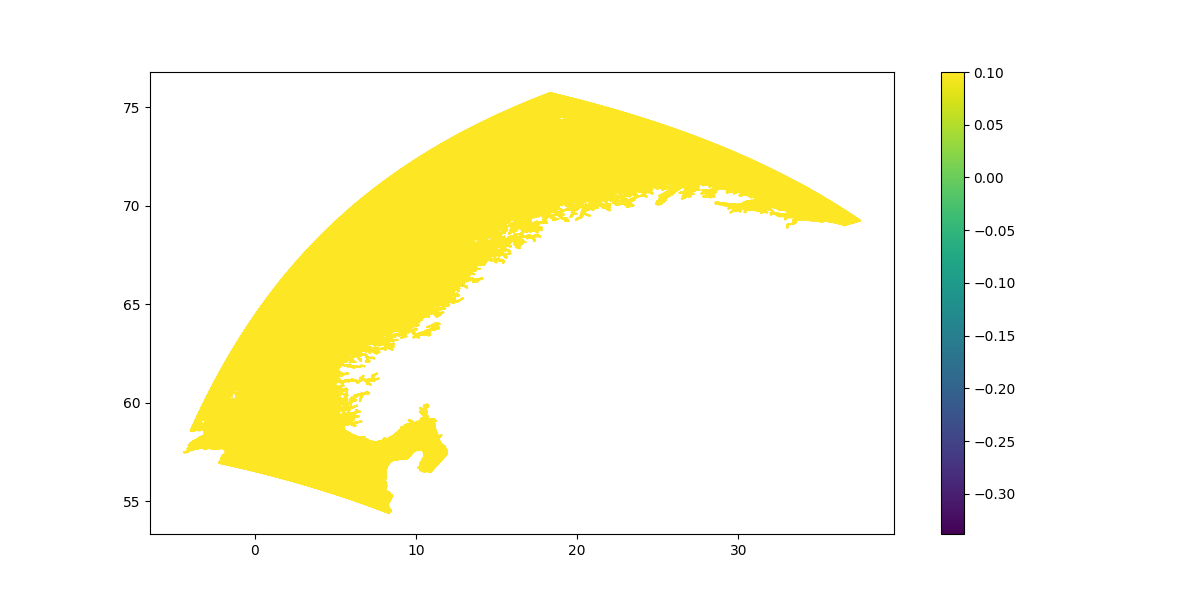

In [85]:
# Plot where saltinity is negative
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

im = ax.scatter(lon,lat, c=sal_neg_range[28,:],s=0.1, vmax=0.1)#,cmap='Set1')
plt.colorbar(im, ax=ax)

In [101]:
# its only one point in each time step???
arg = np.argwhere(sal_neg_range[29, :] < 0).flatten()[0]
print(f"Negative salinity found at indices {arg}")

Negative salinity found at indices 1605795


In [102]:
lon_neg = np.where(sal_neg_range[28, :] < 0, lon, np.nan)
lat_neg = np.where(sal_neg_range[28, :] < 0, lat, np.nan)
sal_neg2 = np.where(sal_neg_range[28, :] < 0, sal_neg_range[28, :], np.nan)

In [94]:
lat_neg.shape, lon_neg.shape, sal_neg2.shape

((3153556,), (3153556,), (3153556,))

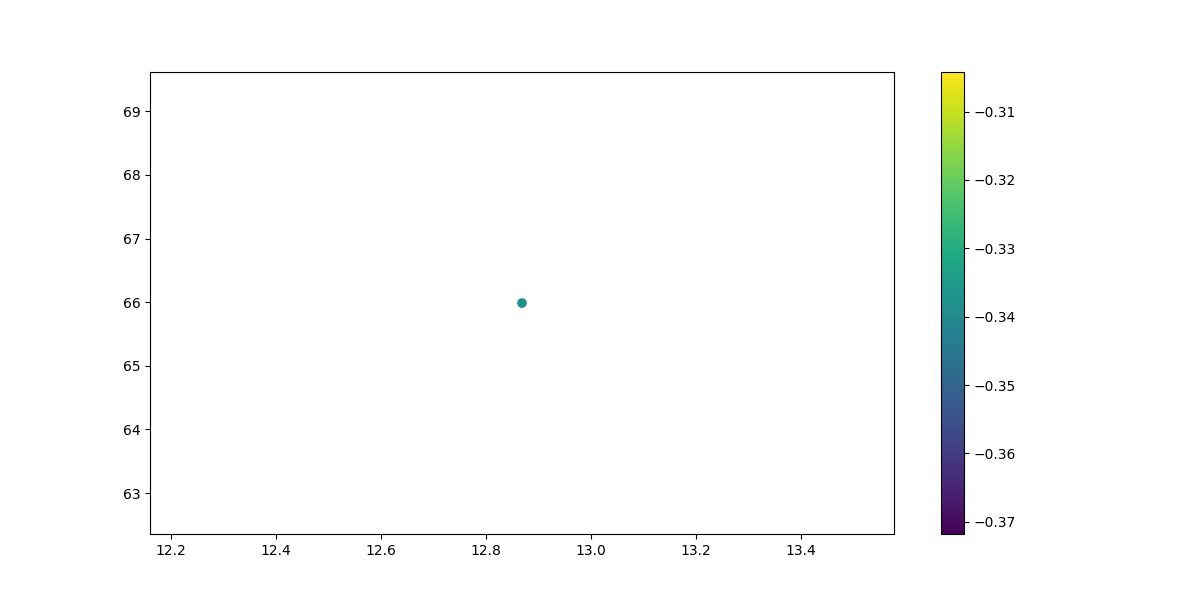

In [93]:
# Plot where saltinity is negative
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 6))

im = ax2.scatter(lon_neg, lat_neg, c=sal_neg2)#, s=0.1)
plt.colorbar(im, ax=ax2)